In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#LOADING IMAGES FROM FOLDER
#BLACK AND WHITE SCALE IS APPLIED
#IMG SIZE IS 128X128 PIXEL FOR DEFAULT
def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    labels = []

    for label_folder in os.listdir(folder):
        if label_folder.startswith('.'):
            continue
        label_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    if label_folder == 'NORMAL':
                        labels.append(0)
                    else:
                        labels.append(1)

    return np.array(images), np.array(labels)

In [ ]:
#FLATTENING IS ESSENTIAL FOR PIXEL VALUES
def flatten_images(images):
    n_samples = images.shape[0]
    return images.reshape((n_samples, -1))  # Flatten each image

In [ ]:
#UPLOADING DATASET

train = '/content/drive/MyDrive/CS464 project/chest_xray/train'
val =  '/content/drive/MyDrive/CS464 project/chest_xray/val'
test = '/content/drive/MyDrive/CS464 project/chest_xray/test'

train_X, train_Y =load_images_from_folder(train, img_size=(128, 128))
val_X, val_Y =load_images_from_folder(val, img_size=(128, 128))
test_X, test_Y =load_images_from_folder(test, img_size=(128, 128))

train_X = flatten_images(train_X)
val_X = flatten_images(val_X)
test_X = flatten_images(test_X)

### WITHOUT GRID SEARCH

In [ ]:
# Define parameter values
C = [0.001, 0.1, 1, 10, 100, 1000]  # Regularization parameter
kernel = ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel type
gamma = ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
degree = [2, 3, 4]  # Only for polynomial kernel


for i in kernel:
    for j in C:
        if i in ['rbf', 'poly', 'sigmoid']:
            for k in gamma:
                if i == 'poly':
                    for l in degree:
                        svm_model = SVC(kernel=i, C=j, gamma=k, degree=l)
                        svm_model.fit(train_X, train_Y)
                        val_pred_Y = svm_model.predict(val_X)
                        accuracy = accuracy_score(val_Y, val_pred_Y)
                        f1 = f1_score(val_Y, val_pred_Y)
                        print(f"Kernel: {i}, C: {j}, Gamma: {k}, Degree: {l}, Accuracy: {accuracy}, F1 Score: {f1}")
                else:
                    svm_model = SVC(kernel=i, C=j, gamma=k)
                    svm_model.fit(train_X, train_Y)
                    val_pred_Y = svm_model.predict(val_X)
                    accuracy = accuracy_score(val_Y, val_pred_Y)
                    f1 = f1_score(val_Y, val_pred_Y)
                    print(f"Kernel: {i}, C: {j}, Gamma: {k}, Accuracy: {accuracy}, F1 Score: {f1}")
        else:
            svm_model = SVC(kernel=i, C=j)
            svm_model.fit(train_X, train_Y)
            val_pred_Y = svm_model.predict(val_X)
            accuracy = accuracy_score(val_Y, val_pred_Y)
            f1 = f1_score(val_Y, val_pred_Y)
            print(f"Kernel: {i}, C: {j}, Accuracy: {accuracy}, F1 Score: {f1}")


Kernel: linear, C: 0.001, Accuracy: 0.6435185185185185, F1 Score: 0.7372013651877133
Kernel: linear, C: 0.1, Accuracy: 0.6435185185185185, F1 Score: 0.7372013651877133
Kernel: linear, C: 1, Accuracy: 0.6435185185185185, F1 Score: 0.7372013651877133
Kernel: linear, C: 10, Accuracy: 0.6435185185185185, F1 Score: 0.7372013651877133
Kernel: linear, C: 100, Accuracy: 0.6435185185185185, F1 Score: 0.7372013651877133
Kernel: linear, C: 1000, Accuracy: 0.6435185185185185, F1 Score: 0.7372013651877133
Kernel: rbf, C: 0.001, Gamma: scale, Accuracy: 0.5, F1 Score: 0.6666666666666666
Kernel: rbf, C: 0.001, Gamma: auto, Accuracy: 0.5, F1 Score: 0.6666666666666666
Kernel: rbf, C: 0.1, Gamma: scale, Accuracy: 0.6481481481481481, F1 Score: 0.7379310344827587
Kernel: rbf, C: 0.1, Gamma: auto, Accuracy: 0.5, F1 Score: 0.6666666666666666
Kernel: rbf, C: 1, Gamma: scale, Accuracy: 0.6296296296296297, F1 Score: 0.7278911564625851
Kernel: rbf, C: 1, Gamma: auto, Accuracy: 0.5, F1 Score: 0.6666666666666666
K

### WITH GRID SEARCH

In [ ]:
# # GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True,
# #              cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
# }

# if 'poly' in param_grid['kernel']:
#     param_grid['degree'] = [2, 3, 4]

# svm = SVC()

# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

# grid_search.fit(train_X, train_Y)

# # This is for retriewing the best model
# best_svm_model = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [ ]:
#TEST ACCURACY WITH COMBINED DATA VAL AND TRAIN
combined_train_val_X = np.concatenate((val_X, train_X), axis=0)
combined_train_val_Y = np.concatenate((val_Y, train_Y), axis=0)

svm_model_opt = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_model_opt.fit(combined_train_val_X, combined_train_val_Y)

svm_pred_Y = svm_model_opt.predict(test_X)
print("test Accuracy:", accuracy_score(test_Y, svm_pred_Y))
print("test F1 Score:", f1_score(test_Y, svm_pred_Y))

test Accuracy: 0.8207547169811321
test F1 Score: 0.8823529411764706


In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#WE CREATED TEST IMAGES FROM THE TEST DATA AND TRAIN IMAGES FROM TRAIN DATA TO AVIOD BIAS.

train_generator = datagen.flow_from_directory(
    train,
    target_size=(128, 128),
    batch_size=10000,
    class_mode='binary',
    color_mode='grayscale'
)


Found 5239 images belonging to 2 classes.


In [ ]:
#WE CREATED 10000 IMAGE FOR TRAINING

Created_train_X, Created_train_Y = next(train_generator)
Created_train_X = flatten_images(Created_train_X)
combined_train_X = np.concatenate((Created_train_X, combined_train_val_X), axis=0)
combined_train_Y = np.concatenate((Created_train_Y, combined_train_val_Y), axis=0)

In [ ]:
svm_model_final = SVC(kernel='rbf', C=0.1, gamma='scale')
svm_model_final.fit(combined_train_X, combined_train_Y)

svm_pred_Y_final = svm_model_final.predict(test_X)
print("test Accuracy:", accuracy_score(test_Y, svm_pred_Y_final))
print("test F1 Score:", f1_score(test_Y, svm_pred_Y_final))

test Accuracy: 0.8301886792452831
test F1 Score: 0.8875


              precision    recall  f1-score   support

           0       0.93      0.47      0.62       134
           1       0.80      0.98      0.88       290

    accuracy                           0.82       424
   macro avg       0.86      0.73      0.75       424
weighted avg       0.84      0.82      0.80       424



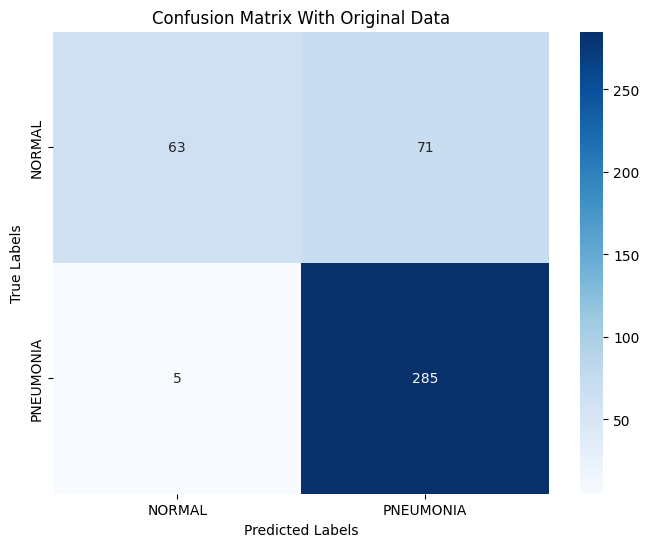

              precision    recall  f1-score   support

           0       0.92      0.51      0.65       134
           1       0.81      0.98      0.89       290

    accuracy                           0.83       424
   macro avg       0.87      0.74      0.77       424
weighted avg       0.85      0.83      0.81       424



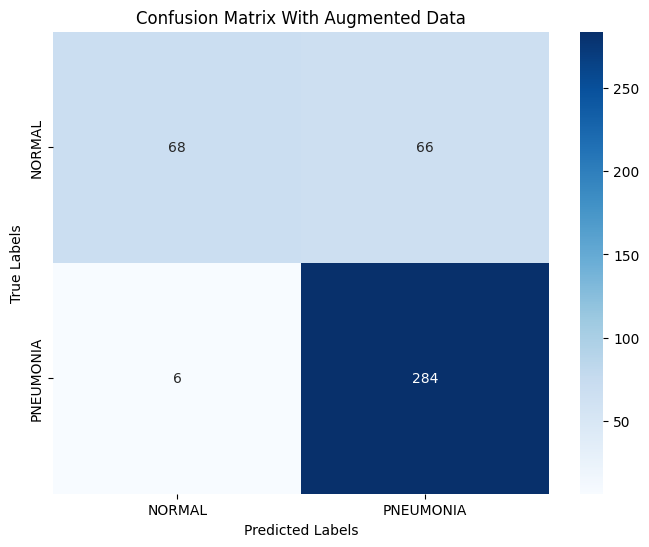

In [ ]:
#PERFORMANCE MATRIX

print(classification_report(test_Y, svm_pred_Y))

cm = confusion_matrix(test_Y, svm_pred_Y)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Original Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


print(classification_report(test_Y, svm_pred_Y_final))

cm = confusion_matrix(test_Y, svm_pred_Y_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Augmented Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Classification Report With Original Data:
              precision    recall  f1-score   support

           0       0.93      0.47      0.62       134
           1       0.80      0.98      0.88       290

    accuracy                           0.82       424
   macro avg       0.86      0.73      0.75       424
weighted avg       0.84      0.82      0.80       424



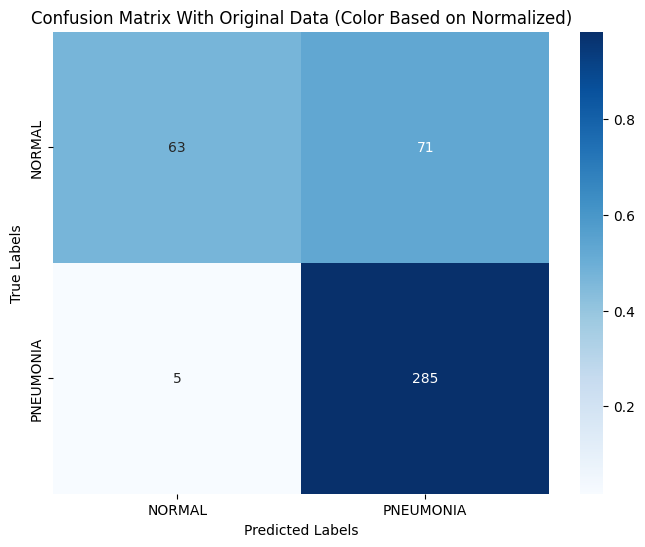

Classification Report With Augmented Data:
              precision    recall  f1-score   support

           0       0.92      0.51      0.65       134
           1       0.81      0.98      0.89       290

    accuracy                           0.83       424
   macro avg       0.87      0.74      0.77       424
weighted avg       0.85      0.83      0.81       424



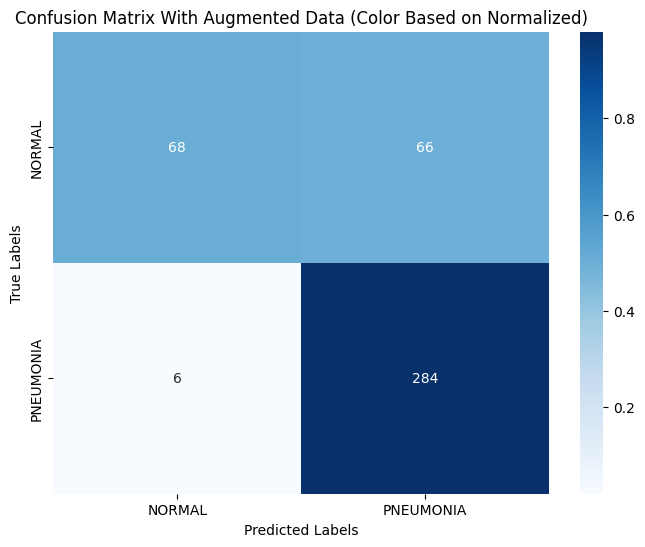

In [ ]:
print("Classification Report With Original Data:")
print(classification_report(test_Y, svm_pred_Y))

cm_original = confusion_matrix(test_Y, svm_pred_Y)

cm_original_normalized = cm_original.astype('float') / cm_original.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_original_normalized, annot=cm_original, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Original Data (Color Based on Normalized)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("Classification Report With Augmented Data:")
print(classification_report(test_Y, svm_pred_Y_final))

cm_augmented = confusion_matrix(test_Y, svm_pred_Y_final)

cm_augmented_normalized = cm_augmented.astype('float') / cm_augmented.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_augmented_normalized, annot=cm_augmented, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix With Augmented Data (Color Based on Normalized)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
#PRECISION, RECALL, F-STAT

precision = precision_score(test_Y, svm_pred_Y)
recall = recall_score(test_Y, svm_pred_Y)
f1 = f1_score(test_Y, svm_pred_Y)

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")
print("Accuracy:", accuracy_score(test_Y, svm_pred_Y))
print('\n')


precision_aug = precision_score(test_Y, svm_pred_Y_final)
recall_aug = recall_score(test_Y, svm_pred_Y_final)
f1_aug = f1_score(test_Y, svm_pred_Y_final)

print(f"Precision Aug: {precision_aug}")
print(f"Recall Aug: {recall_aug}")
print(f"F1-score Aug: {f1_aug}")
print("Accuracy Aug:", accuracy_score(test_Y, svm_pred_Y_final))

Precision : 0.800561797752809
Recall : 0.9827586206896551
F1-score : 0.8823529411764706
Accuracy: 0.8207547169811321


Precision Aug: 0.8114285714285714
Recall Aug: 0.9793103448275862
F1-score Aug: 0.8875
Accuracy Aug: 0.8301886792452831
